## word2vec

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [128]:
news = pd.read_csv('../Data/news_classification_Feb29_24.csv')
test = pd.read_csv('../Data/test_set_Feb29_2024.csv')

In [129]:
stop_words = set(stopwords.words('english'))

In [130]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Apply the preprocessing to your DataFrame
news['processed_text'] = news['text'].apply(preprocess_text)
test['processed_text'] = test['text'].apply(preprocess_text)

In [190]:
test.head()

,title,text,label,source,url,processed_text,vectorized_text,vectorized_text_2
0,Exclusive: Former Biden Aide Paid Fani Willis’...,The money flow is significant because sources ...,fake_news,breitbart,https://www.breitbart.com/politics/2024/02/29/...,"[money, flow, significant, sources, direct, kn...","[[-0.39890715, -0.03380034, -0.48115337, 0.770...","[[-1.2585266, 0.042758048, -1.0156364, -0.1676..."
1,Judges in Trump-related cases face unprecedent...,U.S.District Judge Royce Lamberth has been thr...,real_news,reuters,https://www.reuters.com/investigates/special-r...,"[judge, royce, lamberth, threatened, angry, cr...","[[-1.7725422, -0.16123313, -0.8152432, 0.62798...","[[-2.873799, 0.8920863, -0.26101625, 1.6589578..."
2,Meet the Experienced Democrat Operative the Bi...,The Biden regime’s collusion with corrupt Fult...,fake_news,thegatewaypundit,https://www.thegatewaypundit.com/2024/02/meet-...,"[biden, regime, collusion, corrupt, fulton, co...","[[-0.949886, -0.8198377, -0.39757606, 0.531120...","[[-0.92842406, -0.5851176, 0.12598893, -0.1169..."
3,Biden pressures Trump to unblock migrant plan ...,"U.S. President Joe Biden and Donald Trump, his...",real_news,reuters,https://www.reuters.com/world/us/biden-trump-m...,"[president, joe, biden, donald, trump, likely,...","[[-1.1756338, 0.4611293, 0.23749888, 0.5768696...","[[-1.4385641, -1.0598563, -0.10175453, 0.57911..."
4,Biden and Trump’s dueling border visits will e...,Two presidents will visit the southern US bord...,real_news,cnn,https://www.cnn.com/2024/02/29/politics/border...,"[two, presidents, visit, southern, us, border,...","[[-0.6328635, 0.9525837, -0.5814336, -1.175410...","[[-0.7443906, 1.439201, -0.13013153, 0.1510271..."


**processed_text is list of tokens for each row (each news).**

In [132]:
sentences_train = news['processed_text'].tolist()

**sentences_train is list of lists, each list in it is a list of tokens for each row.**

In [193]:
len(sentences_train) # totally 37546 news for train

37546

**train the model, just like fit**

In [134]:
model_wv = Word2Vec(sentences_train, vector_size=300, window=5, min_count=1, workers=4)

In [162]:
model_wv.wv

**wordvec have no attribute dv, only have wv.**

In [135]:
def vectorize_text(text, model):
    vectorized_text = []
    for word in text:
        if word in model.wv:
            vectorized_text.append(model.wv[word])
    return vectorized_text

**vectorize the text, this operation just like map, map each word to its vector in trained model, just like transform**

In [136]:
#transform the train set
news['vectorized_text'] = news['processed_text'].apply(lambda x: vectorize_text(x, model_wv))
#transform the test set
test['vectorized_text'] = test['processed_text'].apply(lambda x: vectorize_text(x, model_wv))

In [137]:
test.head()

,title,text,label,source,url,processed_text,vectorized_text
0,Exclusive: Former Biden Aide Paid Fani Willis’...,The money flow is significant because sources ...,fake_news,breitbart,https://www.breitbart.com/politics/2024/02/29/...,"[money, flow, significant, sources, direct, kn...","[[-0.39890715, -0.03380034, -0.48115337, 0.770..."
1,Judges in Trump-related cases face unprecedent...,U.S.District Judge Royce Lamberth has been thr...,real_news,reuters,https://www.reuters.com/investigates/special-r...,"[judge, royce, lamberth, threatened, angry, cr...","[[-1.7725422, -0.16123313, -0.8152432, 0.62798..."
2,Meet the Experienced Democrat Operative the Bi...,The Biden regime’s collusion with corrupt Fult...,fake_news,thegatewaypundit,https://www.thegatewaypundit.com/2024/02/meet-...,"[biden, regime, collusion, corrupt, fulton, co...","[[-0.949886, -0.8198377, -0.39757606, 0.531120..."
3,Biden pressures Trump to unblock migrant plan ...,"U.S. President Joe Biden and Donald Trump, his...",real_news,reuters,https://www.reuters.com/world/us/biden-trump-m...,"[president, joe, biden, donald, trump, likely,...","[[-1.1756338, 0.4611293, 0.23749888, 0.5768696..."
4,Biden and Trump’s dueling border visits will e...,Two presidents will visit the southern US bord...,real_news,cnn,https://www.cnn.com/2024/02/29/politics/border...,"[two, presidents, visit, southern, us, border,...","[[-0.6328635, 0.9525837, -0.5814336, -1.175410..."


In [138]:
len(test.processed_text.iloc[0]), len(test.vectorized_text.iloc[0])

(270, 256)

In [139]:
len(test.processed_text.iloc[1]), len(test.vectorized_text.iloc[1])

(514, 506)

In [140]:
len(test.processed_text.iloc[2]), len(test.vectorized_text.iloc[2])

(267, 258)

In [141]:
test.vectorized_text.iloc[0]   # list of arrays

[array([-3.98907155e-01, -3.38003412e-02, -4.81153369e-01,  7.70181358e-01,
        -1.25971818e+00, -5.87086022e-01, -9.02041614e-01, -7.01301321e-02,
        -3.31923276e-01,  1.93368897e-01, -8.45861554e-01,  1.07998228e+00,
        -1.99173260e+00, -7.40932599e-02,  1.84201443e+00, -9.29316759e-01,
         1.38825893e+00,  1.48321366e+00,  6.34258032e-01, -6.20740533e-01,
        -1.02693176e+00,  6.17950916e-01,  6.21136129e-02,  7.26324081e-01,
        -1.62722602e-01,  5.36573112e-01,  4.38675471e-02,  2.32097602e+00,
         1.88418400e+00,  1.11768031e+00, -1.94370449e+00, -1.78449321e+00,
        -1.30926251e+00,  6.78074598e-01, -1.73842895e+00, -8.64148498e-01,
        -3.37110251e-01,  8.96799415e-02,  8.56985152e-01, -2.37038803e+00,
         7.59988606e-01,  1.19463736e-02,  4.02019292e-01,  1.90093267e+00,
        -1.06869243e-01, -1.53586543e+00,  2.62154639e-02,  1.16878605e+00,
         1.61761904e+00,  3.12086016e-01,  1.50213420e+00,  1.66865897e+00,
         1.1

**vectorized_text is list of arrays, each array in it is a vector for each word with dimension 1000. each vectorized_text have different rows (# of words is different) but same columns 1000.**

In [142]:
np.mean(test.vectorized_text.iloc[0], axis=0)

array([-0.18452144,  0.21774058,  0.15127969,  0.1513937 ,  0.06547831,
       -0.39906627,  0.05406392,  0.3560106 , -0.06370801, -0.18671355,
       -0.01748312, -0.22491665, -0.01018905, -0.01118901,  0.1687645 ,
       -0.05146058,  0.15026595, -0.23302554,  0.15621874,  0.11338688,
       -0.20018265, -0.21221472, -0.10204724, -0.14628002, -0.08377162,
        0.0606789 , -0.06181704,  0.3502147 ,  0.08188857, -0.19085288,
        0.30086917, -0.06155699, -0.1698367 ,  0.06198616,  0.08133613,
       -0.00750674,  0.31613037,  0.06713902,  0.00589883,  0.08285253,
       -0.03165706, -0.21709986,  0.24120677, -0.00715924,  0.22186214,
       -0.14344056, -0.05887018, -0.03029539, -0.02177869,  0.16709669,
        0.03631845,  0.17492667,  0.01726615,  0.18517603, -0.06649104,
        0.14962624, -0.23776715, -0.05891441,  0.02548247, -0.23341762,
       -0.05522812, -0.28211892,  0.10322967, -0.04420007,  0.26330563,
        0.10132474,  0.2519637 ,  0.11559166,  0.16886489,  0.03

In [143]:
np.mean(test.vectorized_text.iloc[0], axis=0).shape # use axis=0, average word by word to keep dimension 1000 for each row. 

(300,)

In [148]:
X_train = news['vectorized_text'].apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_wv.vector_size)).values    
# there maybe empty list in vectorized_text
y_train = news.label
X_test = test['vectorized_text'].apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_wv.vector_size)).values
# there maybe empty list in vectorized_text
y_test = test.label

In [149]:
for i in range(len(news.vectorized_text)):
    if news.vectorized_text.iloc[i]==[]:
        print(i)

2308
9843
17772
27908
34288


**definitely, there are empty [] in news.vectorized_text, check them**

In [150]:
news.iloc[2308].text, news.iloc[9843].text, news.iloc[17772].text, news.iloc[27908].text, news.iloc[34288].text

('U.S.', '// <!', 'Here you have it!', '.', '.')

In [151]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)

In [153]:
accuracy

0.92

In [154]:
y_test_pred.shape

(25,)

In [155]:
y_test.shape

(25,)

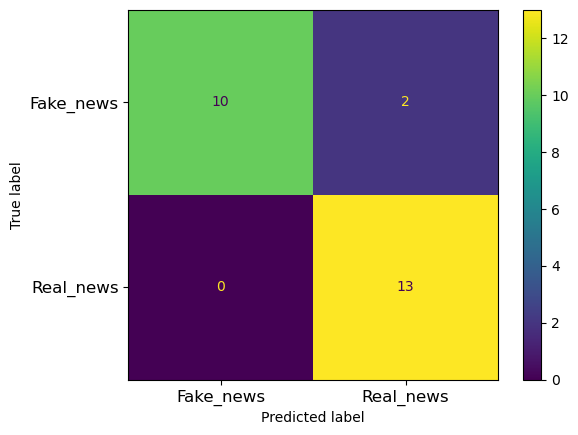

In [156]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr_model.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

## doc2vec

In [194]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [195]:
tagged_data_train = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(news.processed_text)]

**tagged_data_train is almost same as sentence_train, also one list of tokens for one news, except have tag**

In [196]:
len(tagged_data_train)

37546

In [198]:
model_dv = Doc2Vec(tagged_data_train, vector_size=300, window=5, min_count=1, workers=4)

In [199]:
model_dv.dv

In [200]:
model_dv.wv

In [218]:
tagged_data_test = [TaggedDocument(words=doc, tags=[f'test_{i}']) for i, doc in enumerate(test.processed_text)]

In [220]:
doc_vectors_test = [model_dv.infer_vector(tagged_data.words) for tagged_data in tagged_data_test]

**doc_vectors_test is list of arrays**

In [235]:
doc_vectors_train = [model_dv.dv[str(i)] for i in range(len(tagged_data_train))]

**doc_vectors_train is also list of arrays**

In [236]:
X_train = np.vstack(doc_vectors_train)
X_test = np.vstack(doc_vectors_test)

In [237]:
X_train.shape, X_test.shape

((37546, 300), (25, 300))

In [238]:
y_train = news.label
y_test = test.label

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)

In [240]:
accuracy

0.92

In [241]:
y_test_pred.shape

(25,)

In [242]:
y_test.shape

(25,)

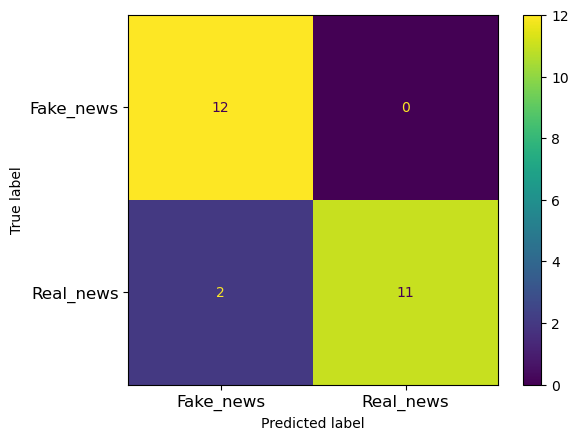

In [243]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr_model.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

**doc2vec have attribute wv and dv.**

In [201]:
def vectorize_text(text, model):
    vectorized_text = []
    for word in text:
        if word in model.wv:
            vectorized_text.append(model.wv[word])
    return vectorized_text

In [202]:
news['vectorized_text_2'] = news['processed_text'].apply(lambda x: vectorize_text(x, model_dv))
test['vectorized_text_2'] = test['processed_text'].apply(lambda x: vectorize_text(x, model_dv))

In [203]:
test.head()

,title,text,label,source,url,processed_text,vectorized_text,vectorized_text_2
0,Exclusive: Former Biden Aide Paid Fani Willis’...,The money flow is significant because sources ...,fake_news,breitbart,https://www.breitbart.com/politics/2024/02/29/...,"[money, flow, significant, sources, direct, kn...","[[-0.39890715, -0.03380034, -0.48115337, 0.770...","[[-0.13642469, 0.55203885, -0.21404979, 0.7078..."
1,Judges in Trump-related cases face unprecedent...,U.S.District Judge Royce Lamberth has been thr...,real_news,reuters,https://www.reuters.com/investigates/special-r...,"[judge, royce, lamberth, threatened, angry, cr...","[[-1.7725422, -0.16123313, -0.8152432, 0.62798...","[[-2.606647, 0.16775447, -0.22777812, 1.211738..."
2,Meet the Experienced Democrat Operative the Bi...,The Biden regime’s collusion with corrupt Fult...,fake_news,thegatewaypundit,https://www.thegatewaypundit.com/2024/02/meet-...,"[biden, regime, collusion, corrupt, fulton, co...","[[-0.949886, -0.8198377, -0.39757606, 0.531120...","[[-1.2882874, -1.5586498, -0.2797553, 0.381404..."
3,Biden pressures Trump to unblock migrant plan ...,"U.S. President Joe Biden and Donald Trump, his...",real_news,reuters,https://www.reuters.com/world/us/biden-trump-m...,"[president, joe, biden, donald, trump, likely,...","[[-1.1756338, 0.4611293, 0.23749888, 0.5768696...","[[-1.233413, 0.25778762, 1.0286716, -0.2410035..."
4,Biden and Trump’s dueling border visits will e...,Two presidents will visit the southern US bord...,real_news,cnn,https://www.cnn.com/2024/02/29/politics/border...,"[two, presidents, visit, southern, us, border,...","[[-0.6328635, 0.9525837, -0.5814336, -1.175410...","[[-0.55023426, 1.91005, -0.24607621, 0.3863118..."


In [204]:
len(test.processed_text.iloc[0]), len(test.vectorized_text_2.iloc[0])

(270, 256)

In [205]:
len(test.processed_text.iloc[1]), len(test.vectorized_text_2.iloc[1])

(514, 506)

In [206]:
len(test.processed_text.iloc[2]), len(test.vectorized_text_2.iloc[2])

(267, 258)

In [207]:
test.vectorized_text_2.iloc[0]

[array([-0.13642469,  0.55203885, -0.21404979,  0.7078526 , -0.9186602 ,
         0.45297036, -0.6512615 , -1.0920426 ,  1.4718844 , -0.03323867,
        -0.19729683,  1.8296496 , -2.0031464 ,  0.32657635,  1.6637942 ,
         0.41509694,  0.89755315,  1.2760782 , -0.699819  , -0.05922585,
        -0.48113978, -0.5636769 , -0.15060614,  2.3495173 , -1.2620568 ,
        -0.18503378, -0.0998529 ,  2.2362194 ,  1.2778052 ,  1.6099675 ,
        -0.31926292, -1.0241013 , -0.7283408 , -0.66211087, -0.4421617 ,
        -1.7933017 ,  0.657312  ,  1.1599436 ,  2.0626662 , -0.6974106 ,
         0.4647    ,  0.53419983, -0.6075783 ,  1.0610878 , -0.35699654,
        -0.50137514,  0.59245396,  1.2283982 ,  1.3725727 ,  0.35961902,
         1.5645558 ,  1.7971443 ,  3.028779  , -1.384609  ,  3.1460958 ,
        -0.2667435 ,  0.34958297,  0.5150208 ,  0.58106136, -1.8328686 ,
         0.02528107, -0.47143736, -0.8634335 , -0.8626833 ,  0.33212814,
        -2.2197828 ,  0.33056498, -0.549438  ,  0.5

In [208]:
np.mean(test.vectorized_text_2.iloc[0], axis=0)

array([-2.24586204e-01,  2.10381821e-01,  1.75416037e-01,  3.52647096e-01,
        5.28350146e-03, -3.20338815e-01, -8.36366341e-02, -1.19695164e-01,
       -1.15422852e-01, -2.00989559e-01, -2.33942717e-02,  1.55951083e-01,
        3.45409423e-01, -4.72331531e-02,  2.72652149e-01, -2.33879127e-02,
        5.35525978e-02, -1.25997469e-01, -1.49582386e-01,  3.65374297e-01,
       -7.25070536e-02, -2.75260936e-02, -4.93027389e-01,  3.19228411e-01,
       -3.80399197e-01, -6.38839304e-02, -4.98614609e-02,  5.13350487e-01,
        2.81845599e-01,  1.49361148e-01,  2.20860541e-01, -1.17306538e-01,
        6.74042404e-02, -5.97720891e-02, -1.79741755e-01,  1.12834454e-01,
        1.35008350e-01,  4.03231621e-01,  2.13758707e-01,  2.34941810e-01,
       -2.56515369e-02, -1.10712007e-01, -2.14538630e-02,  2.38076895e-01,
        1.65310934e-01, -3.00162643e-01, -2.52442300e-01,  4.86765988e-02,
        3.41231287e-01,  2.16333009e-02, -3.36682260e-01,  9.27351862e-02,
        2.31795266e-01, -

In [209]:
X_train = news['vectorized_text_2'].apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_dv.vector_size)).values    
# there maybe empty list in vectorized_text
y_train = news.label
X_test = test['vectorized_text_2'].apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_dv.vector_size)).values
# there maybe empty list in vectorized_text
y_test = test.label

In [210]:
for i in range(len(news.vectorized_text_2)):
    if news.vectorized_text_2.iloc[i]==[]:
        print(i)

2308
9843
17772
27908
34288


**definitely, there are empty [] in news.vectorized_text, check them**

In [211]:
news.iloc[2308].text, news.iloc[9843].text, news.iloc[17772].text, news.iloc[27908].text, news.iloc[34288].text

('U.S.', '// <!', 'Here you have it!', '.', '.')

In [212]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)

In [214]:
accuracy

0.96

In [215]:
y_test_pred.shape

(25,)

In [216]:
y_test.shape

(25,)

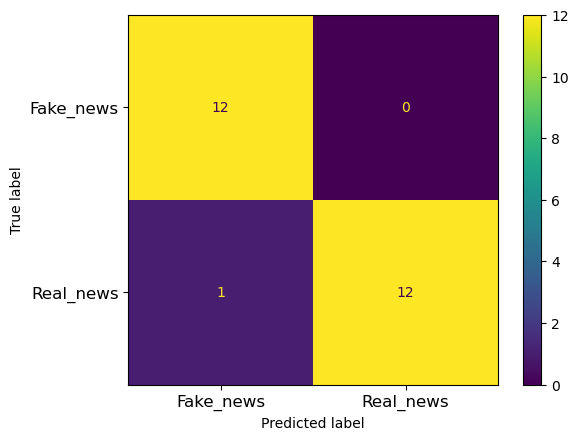

In [217]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr_model.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()